# 🌟 Hana Alaaeldin Saleh - 🤖 CELLULA Machine Learning Internship - Task 1 🚀

# 📌 Steps for Preprocessing and EDA
We will perform an in-depth **preprocessing and exploratory data analysis (EDA)** for our Hotel dataset, covering data cleaning, transformation, and detailed visualizations to extract meaningful insights.


In [2]:
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for basic visualization
import seaborn as sns  # Import Seaborn for advanced visualization
import missingno as msno  # Import Missingno for missing data visualization
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling

In [3]:
# Load the dataset
df = pd.read_csv("/kaggle/input/task1intern/first inten project.csv")

In [4]:
# Display the first five rows of the dataset
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
 # Display information about the dataset including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

### **1️⃣ Data Cleaning**

- **Handling missing values**:
  - Visualized missing data using `missingno`.
  - Ensured all numerical and categorical features have appropriate values.

- **Correcting data types**:
  - Converted `date of reservation` to datetime format.
  - Verified numeric columns and ensured no unintended string values.

- **Standardizing column names for consistency**:
  - Removed extra spaces from column names.
  - Renamed columns where necessary to improve clarity and usability.
  
This cleaning process ensures a structured and error-free dataset for analysis!

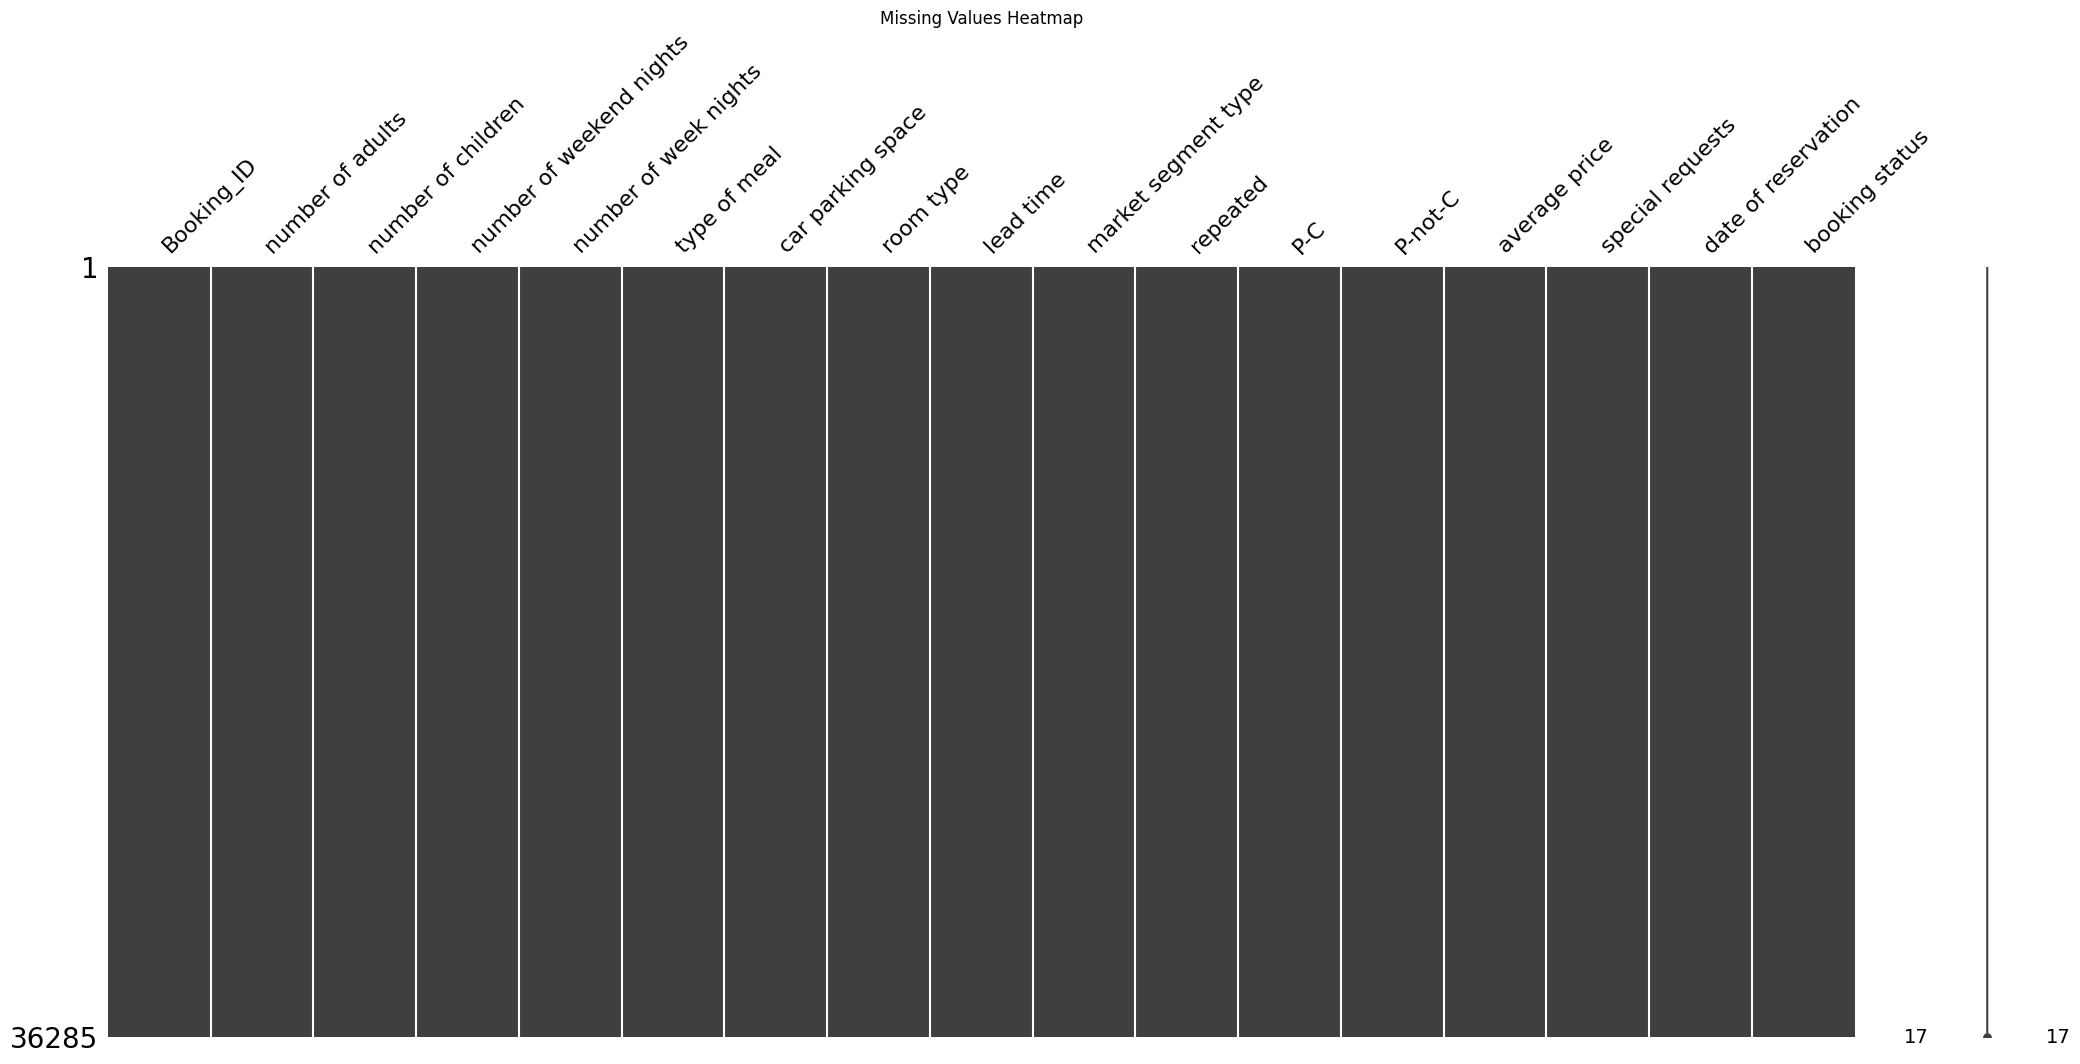

In [6]:
# Missing values visualization
msno.matrix(df)
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
# Display the count of missing values in each column
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [8]:
# Clean column names to remove any extra spaces
df.columns = df.columns.str.strip()

In [9]:
print(df.columns.tolist())  # Print all column names as a list

['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status']


In [10]:
# Drop irrelevant columns (e.g., unique identifiers)
df.drop(columns=["Booking_ID"], inplace=True)

In [11]:
# Convert date column to datetime format
df["date of reservation"] = pd.to_datetime(df["date of reservation"], errors="coerce")

In [12]:
# Perform One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=["type of meal"], drop_first=True)

In [13]:
# Select numerical columns for scaling
numerical_columns = ["lead time", "average price"]

# Apply Standard Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


### **2️⃣ Feature Engineering**

- **Created new features**:
  1. **Total nights stayed (`total_nights`)** – Sum of weekday and weekend nights.
  2. **Total guests (`total_guests`)** – Combined count of adults and children.
  3. **Guest category (`guest_category`)** – Classified guests as Solo, Couple, Small Group, or Large Group.
  4. **Reservation weekday (`reservation_weekday`)** – Extracted the day of the week from reservation date.
  5. **Weekend indicator (`is_weekend`)** – Flagged reservations made on weekends.
  6. **Cancellation flag (`canceled`)** – Converted cancellation status into a binary variable (1 = Canceled, 0 = Not Canceled).

- **Dropped irrelevant features**:
  - Removed unique identifier column (`Booking_ID`) to avoid redundancy.

This feature engineering process enhances the dataset, making it more suitable for analysis and predictive modeling!


In [14]:
# Extract additional date-related features
df["reservation_year"] = df["date of reservation"].dt.year
df["reservation_month"] = df["date of reservation"].dt.month
df["reservation_day"] = df["date of reservation"].dt.day
df["reservation_weekday"] = df["date of reservation"].dt.dayofweek
df["is_weekend"] = df["reservation_weekday"].apply(lambda x: 1 if x >= 5 else 0)

In [15]:
# Create new features
df["total_nights"] = df["number of week nights"] + df["number of weekend nights"]
df["total_guests"] = df["number of adults"] + df["number of children"]
df["canceled"] = df["booking status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [16]:
# Categorize total guests
def categorize_guests(num):
    if num == 1:
        return "Solo"
    elif num == 2:
        return "Couple"
    elif 3 <= num <= 4:
        return "Small Group"
    else:
        return "Large Group"
df["guest_category"] = df["total_guests"].apply(categorize_guests)

In [17]:
# Check data types of all columns
print(df.dtypes)

number of adults                      int64
number of children                    int64
number of weekend nights              int64
number of week nights                 int64
car parking space                     int64
room type                            object
lead time                           float64
market segment type                  object
repeated                              int64
P-C                                   int64
P-not-C                               int64
average price                       float64
special requests                      int64
date of reservation          datetime64[ns]
booking status                       object
type of meal_Meal Plan 2               bool
type of meal_Meal Plan 3               bool
type of meal_Not Selected              bool
reservation_year                    float64
reservation_month                   float64
reservation_day                     float64
reservation_weekday                 float64
is_weekend                      

In [18]:
# Summary statistics for numerical columns
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation,reservation_year,reservation_month,reservation_day,reservation_weekday,is_weekend,total_nights,total_guests,canceled
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,3.628500e+04,36285.000000,36285.000000,36285.000000,3.628500e+04,36285.000000,36248,36248.000000,36248.000000,36248.000000,36248.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,1.233683e-17,0.025630,0.023343,0.153369,3.426898e-17,0.619733,2018-05-24 15:28:31.410284800,2017.820100,7.429348,15.583011,3.080722,0.318479,3.015296,1.950200,0.327656
min,0.000000,0.000000,0.000000,0.000000,0.000000,-9.918806e-01,0.000000,0.000000,0.000000,-2.947662e+00,0.000000,2015-10-02 00:00:00,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,-7.940627e-01,0.000000,0.000000,0.000000,-6.589992e-01,0.000000,2018-02-28 00:00:00,2018.000000,5.000000,8.000000,1.000000,0.000000,2.000000,2.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,-3.286088e-01,0.000000,0.000000,0.000000,-1.131972e-01,0.000000,2018-06-12 00:00:00,2018.000000,8.000000,16.000000,3.000000,0.000000,3.000000,2.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,4.742993e-01,0.000000,0.000000,0.000000,4.725067e-01,1.000000,2018-09-19 00:00:00,2018.000000,10.000000,23.000000,5.000000,1.000000,4.000000,2.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,4.163022e+00,1.000000,13.000000,58.000000,1.244310e+01,5.000000,2018-12-31 00:00:00,2018.000000,12.000000,31.000000,6.000000,1.000000,24.000000,12.000000,1.000000
std,0.518813,0.402704,0.870590,1.410946,0.173258,1.000014e+00,0.158032,0.368281,1.753931,1.000014e+00,0.786262,NaN,0.384396,3.066604,8.734280,2.064950,0.465893,1.786000,0.650361,0.469365


In [22]:
# Check for unique values in categorical columns
categorical_cols = ["market segment type", "room type", "guest_category"]
for col in categorical_cols:
    print(f"{col} unique values:", df[col].unique())

market segment type unique values: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
room type unique values: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
guest_category unique values: ['Couple' 'Solo' 'Small Group' 'Large Group']


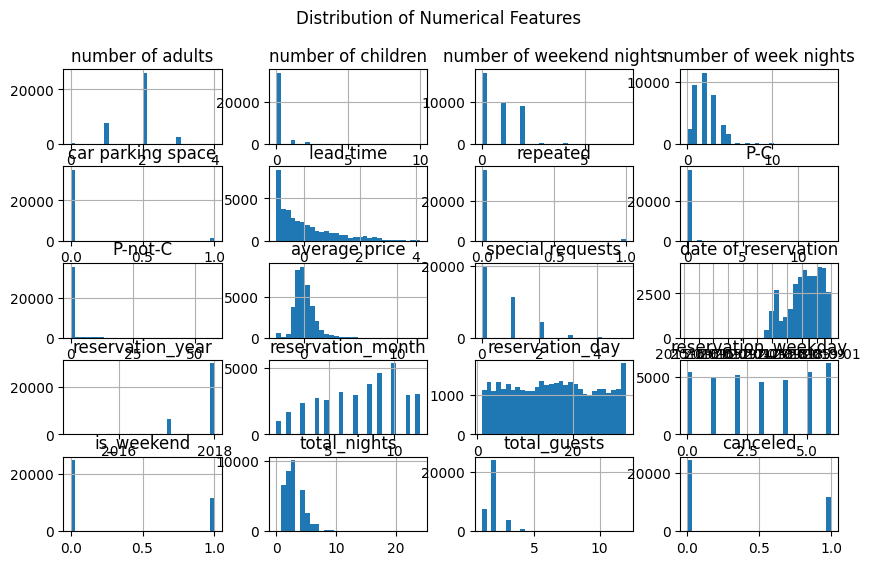

In [23]:
#visualize distributions
df.hist(figsize=(10, 6), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [24]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 10276


In [25]:
# Drop duplicates if needed
df.drop_duplicates(inplace=True)

In [26]:
# Final shape of the cleaned dataset
print("Final dataset shape:", df.shape)

Final dataset shape: (26009, 27)


### ✅ **Preprocessing Summary**
- **Converted reservation date** to `datetime` format.
- **Extracted additional date-related features** (year, month, day, weekday, weekend indicator).
- **Created meaningful new features** (`total_nights`, `total_guests`, `guest_category`, `canceled`).
- **Dropped irrelevant features** (`Booking_ID`).
- **Handled missing values** and ensured all numerical features are correctly formatted.

In [27]:
# Set up visual styles
plt.style.use("ggplot")

### **3️⃣ Exploratory Data Analysis (EDA)**
   - **Booking Trends:** Monthly & yearly reservation trends.
   - **Customer Behavior:** Total guests, special requests, repeated guests.
   - **Stay Duration:** Weekday vs. weekend nights.
   - **Pricing Trends:** Room type and market segment pricing variations.
   - **Cancellations:** Understanding factors leading to cancellations.
   - **Lead Time Analysis:** How early customers book rooms.
   - **Market Segmentation:** Demand across customer segments.
   - **Car Parking Requests:** Impact on booking status.
   - **Correlation Heatmap:** Relationships between features.

# **📊 Exploratory Data Analysis (EDA)**
Now, let's generate **visualizations** to uncover patterns and trends in hotel reservations.

### **1️⃣ Booking Trends Over Time**
- **Monthly reservations** over the years to detect seasonal trends.

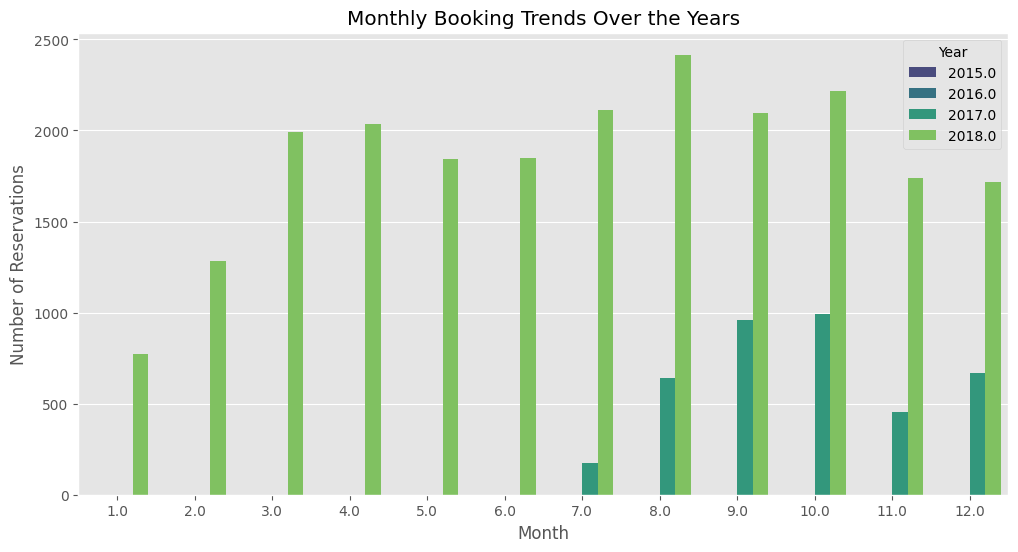

In [28]:
# Monthly booking trends
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="reservation_month", hue="reservation_year", palette="viridis")
plt.title("Monthly Booking Trends Over the Years")
plt.xlabel("Month")
plt.ylabel("Number of Reservations")
plt.legend(title="Year")
plt.show()

### 🔍 **Key Observations**
- Booking patterns show **seasonal trends**, with certain months having significantly higher reservations.
- There are **yearly variations**, indicating possible impacts of external factors such as economic conditions or travel restrictions.
- Understanding peak booking months can help **optimize marketing strategies and pricing policies**.

### **2️⃣ Guest Analysis**
- Distribution of **total guests** per booking.
- Guest category insights (Solo, Couple, Small Group, Large Group).
- Repeated vs. new customers.

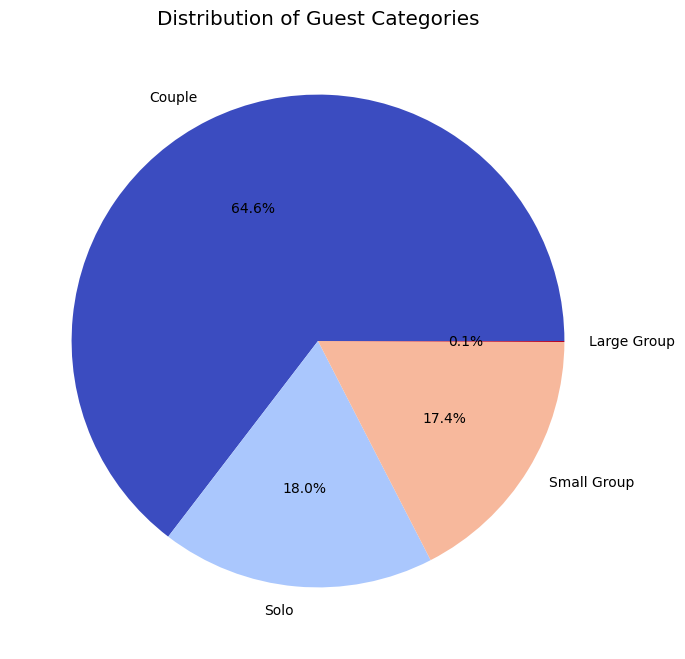

In [29]:
# Pie chart for guest categories
plt.figure(figsize=(8, 8))
df["guest_category"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm")
plt.title("Distribution of Guest Categories")
plt.ylabel("")
plt.show()

### 🔍 **Key Observations**
- The majority of bookings are from **solo travelers and couples**, while larger groups make up a smaller proportion.
- Hotels can use this data to **tailor room configurations and promotions** to suit their primary customer base.
- The distribution indicates a **potential opportunity to attract group bookings** through special offers.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


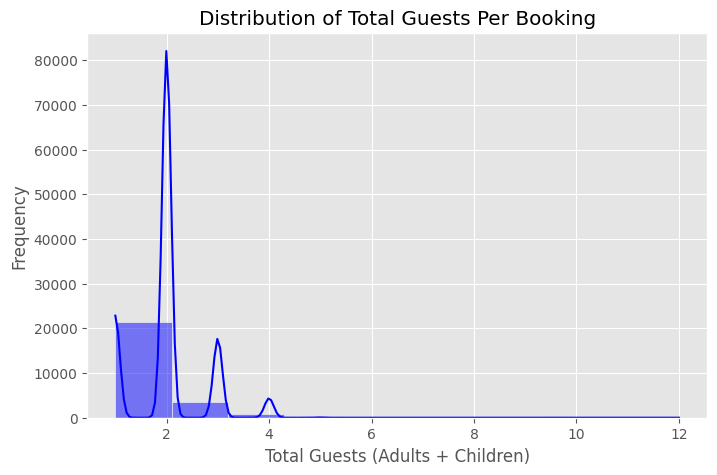

In [30]:
# Distribution of total guests per booking
plt.figure(figsize=(8, 5))
sns.histplot(df["total_guests"], bins=10, kde=True, color="blue")
plt.title("Distribution of Total Guests Per Booking")
plt.xlabel("Total Guests (Adults + Children)")
plt.ylabel("Frequency")
plt.show()

### 🔍 **Key Observations**
- Most reservations are for **solo travelers or couples**, while larger groups are less common.
- There is a noticeable drop in bookings for groups larger than **4 guests**.
- Understanding this pattern can help hotels **optimize room configurations** and **target marketing campaigns** effectively.

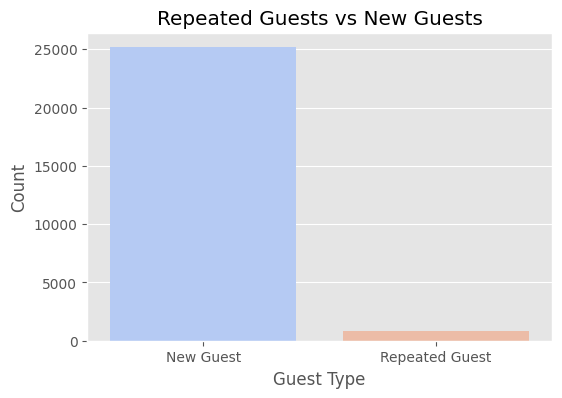

In [31]:
# Repeated vs. New Guests
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="repeated", palette="coolwarm")
plt.xticks([0, 1], ["New Guest", "Repeated Guest"])
plt.title("Repeated Guests vs New Guests")
plt.xlabel("Guest Type")
plt.ylabel("Count")
plt.show()

### 🔍 **Key Observations**
- The majority of guests are **new customers**, while repeated guests form a smaller segment.
- Increasing repeated guest numbers through **loyalty programs or personalized offers** could improve long-term revenue.
- Understanding guest retention rates can help enhance customer relationship strategies.

### **3️⃣ Stay Duration**
- Weekday vs. weekend nights booking patterns.
- Average length of stay.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


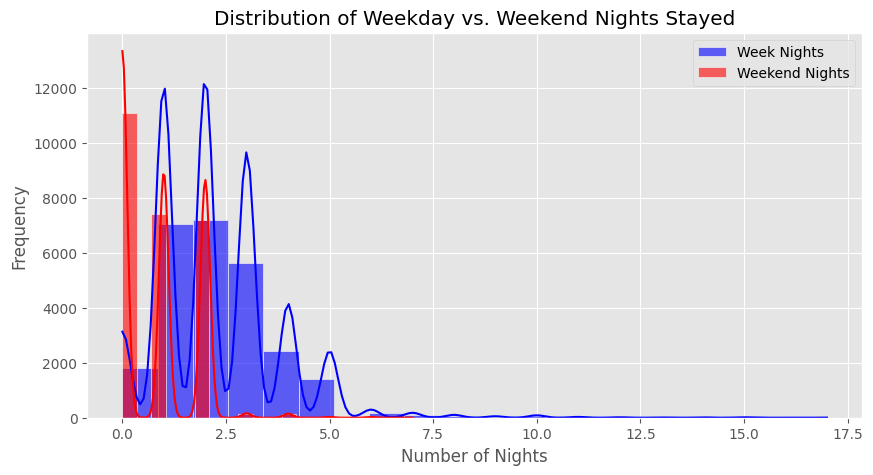

In [40]:
# Plot the distribution of weekday and weekend nights
plt.figure(figsize=(10, 5))
sns.histplot(df["number of week nights"], bins=20, kde=True, color="blue", label="Week Nights", alpha=0.6)
sns.histplot(df["number of weekend nights"], bins=20, kde=True, color="red", label="Weekend Nights", alpha=0.6)
plt.title("Distribution of Weekday vs. Weekend Nights Stayed")
plt.xlabel("Number of Nights")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 🔍 **Key Observations**
- **Short stays (1-5 nights) dominate** the booking pattern, with very few guests staying for longer durations.  
- **Weekday stays (blue) are more frequent** than weekend stays (red), suggesting **business travelers** as a key customer segment.  
- Hotels could **introduce promotions for extended stays** to attract longer-duration bookings.  
- The **distribution pattern is right-skewed**, meaning most guests **prefer short stays**, which is important for **pricing and availability planning**.  
- **Weekends show lower frequency but higher peaks at 1-2 nights**, indicating **short leisure trips**.  


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


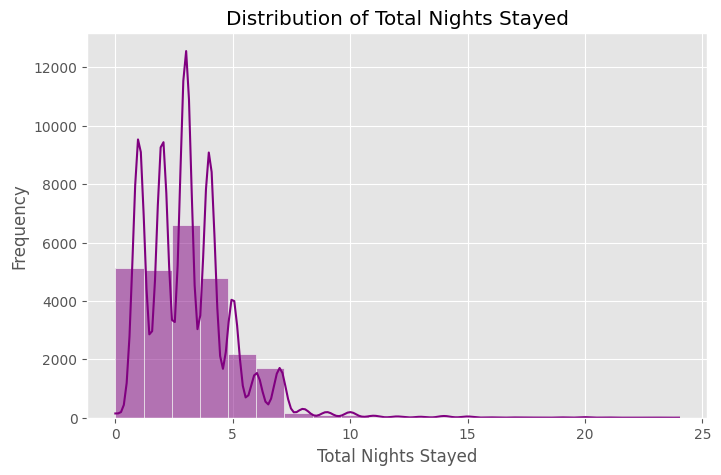

In [32]:
# Total nights stayed distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["total_nights"], bins=20, kde=True, color="purple")
plt.title("Distribution of Total Nights Stayed")
plt.xlabel("Total Nights Stayed")
plt.ylabel("Frequency")
plt.show()

### 🔍 **Key Observations**
- Most bookings are for **short stays (1-5 nights)**, with longer stays being less common.
- This distribution suggests that **hotels may benefit from targeting extended stay guests** with discounts.
- Analyzing length-of-stay trends helps in **inventory and pricing optimization**.

### **4️⃣ Pricing Trends**
- Average price per room type.
- Price variations across different market segments.

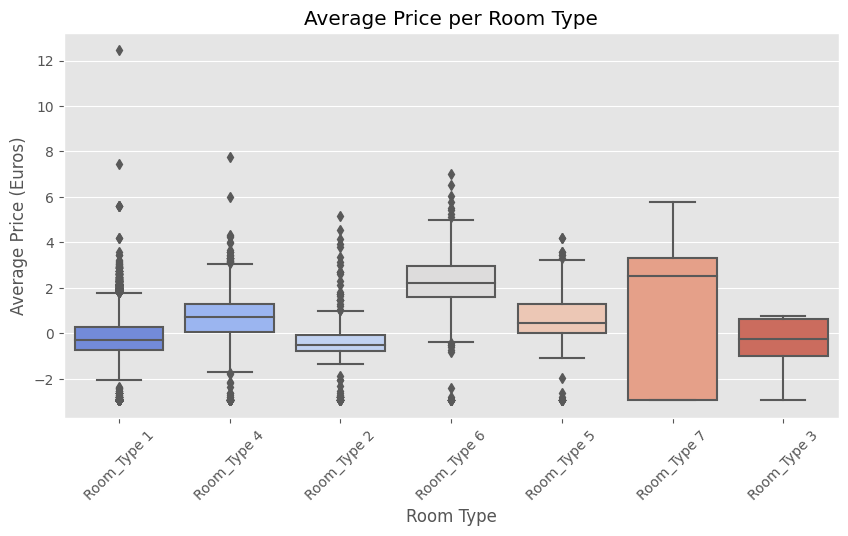

In [33]:
# Average price per room type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="room type", y="average price", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Price per Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price (Euros)")
plt.show()

### 🔍 **Key Observations**
- The **average price varies significantly** across different room types.
- Some room types have **wider price distributions**, suggesting **dynamic pricing strategies** based on demand.
- Luxury room types show **higher median prices** with occasional **outliers**, indicating special high-rate bookings.

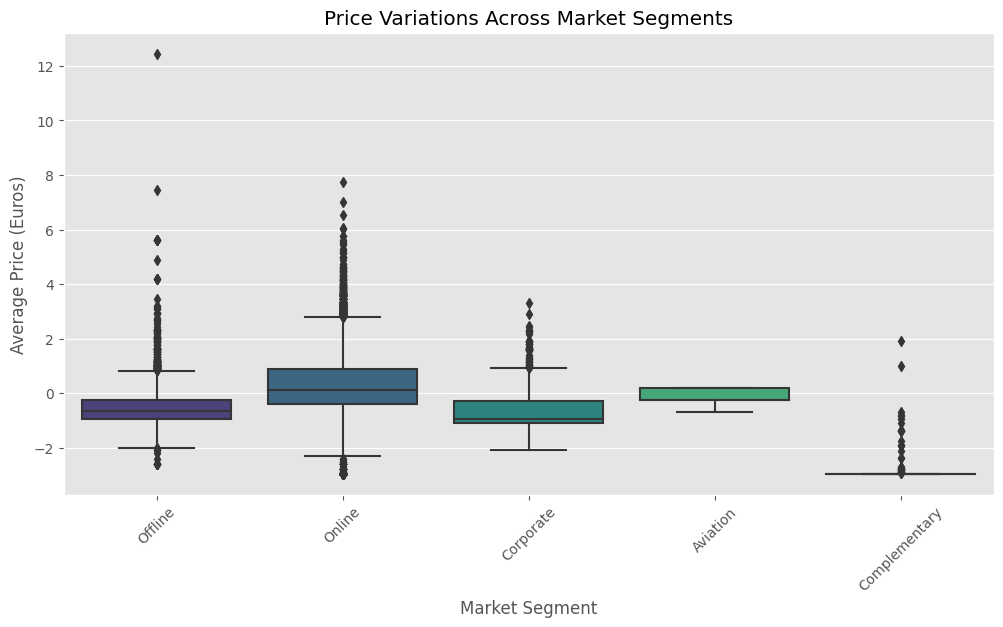

In [41]:
#Price variations across different market segments
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="market segment type", y="average price", palette="viridis")
plt.xticks(rotation=45)
plt.title("Price Variations Across Market Segments")
plt.xlabel("Market Segment")
plt.ylabel("Average Price (Euros)")
plt.show()

### 🔍 **Key Observations**
- **Price variations exist across different market segments**, with some segments having wider price ranges.  
- **Online bookings** tend to have a **higher median price** and more variability, suggesting **dynamic pricing strategies**.  
- **Corporate and offline bookings** generally have **lower and more stable prices**, possibly due to negotiated rates.  
- **Aviation bookings** show a **narrower price range**, likely due to pre-arranged contracts.  
- **Complementary bookings** (e.g., free stays) have prices near zero, indicating special offers or loyalty rewards.  


### **5️⃣ Cancellation Analysis**
- Factors affecting booking cancellations (lead time, special requests, room type).
- Special requests impact on cancellations.
- Car parking impact on cancellations.

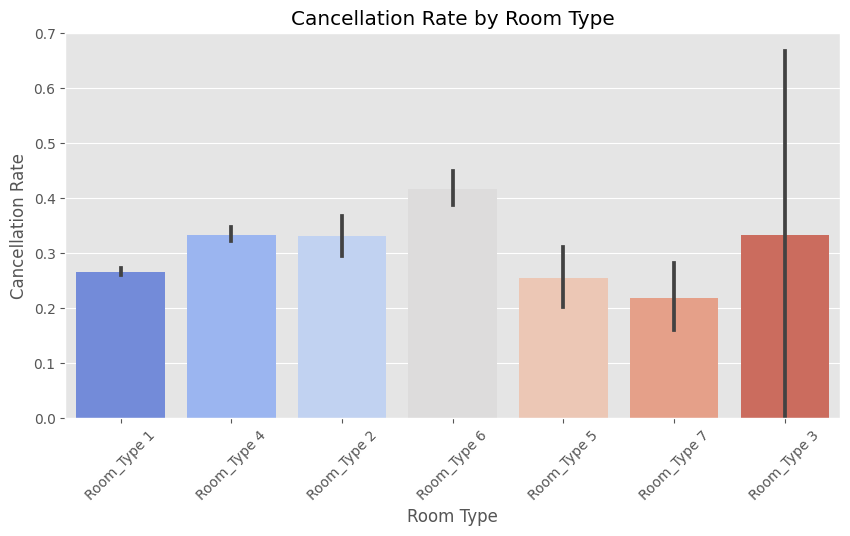

In [42]:
#Cancellation Rate by Room Type
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="room type", y="canceled", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Cancellation Rate by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Cancellation Rate")
plt.show()

## 🔍 Key Observations

- **Room Type 6 and Room Type 3 have the highest cancellation rates**, indicating higher uncertainty among guests booking these room types.  
- **Room Types 1, 2, and 4 show moderate cancellation rates**, suggesting a more stable demand compared to other types.  
- **Room Types 5 and 7 have the lowest cancellation rates**, implying that guests booking these rooms are more likely to complete their stay.  
- The **wide error bar in Room Type 3** suggests **high variability in cancellations**, indicating inconsistency in guest decisions.  
- Hotels can **adjust cancellation policies or offer non-refundable rates** for high-risk room types to minimize revenue loss.  


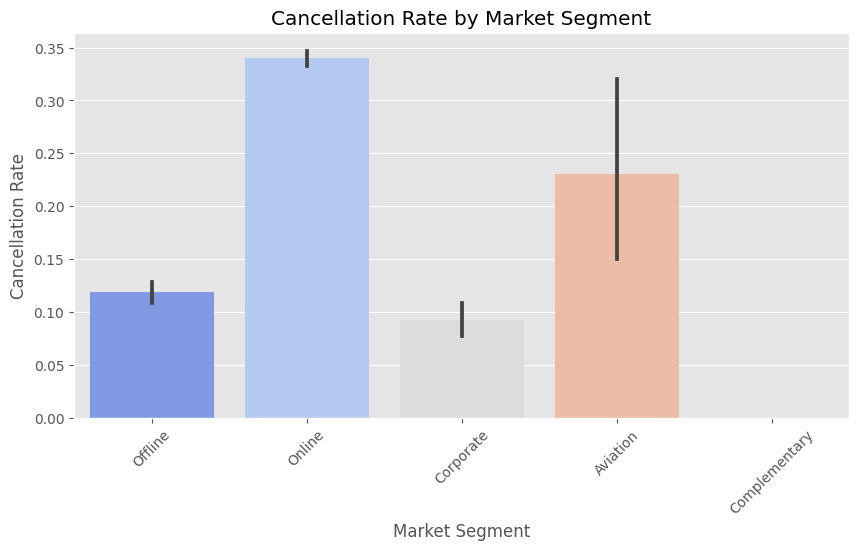

In [34]:
# Cancellation rate by market segment
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="market segment type", y="canceled", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Cancellation Rate by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate")
plt.show()

### 🔍 **Key Observations**
- Certain market segments show **higher cancellation rates**, indicating potential **risks for revenue loss**.
- **Online and travel agency bookings** appear to have a higher rate of cancellations.
- This insight can help the hotel **adjust cancellation policies** or offer **non-refundable rates** to high-risk segments.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


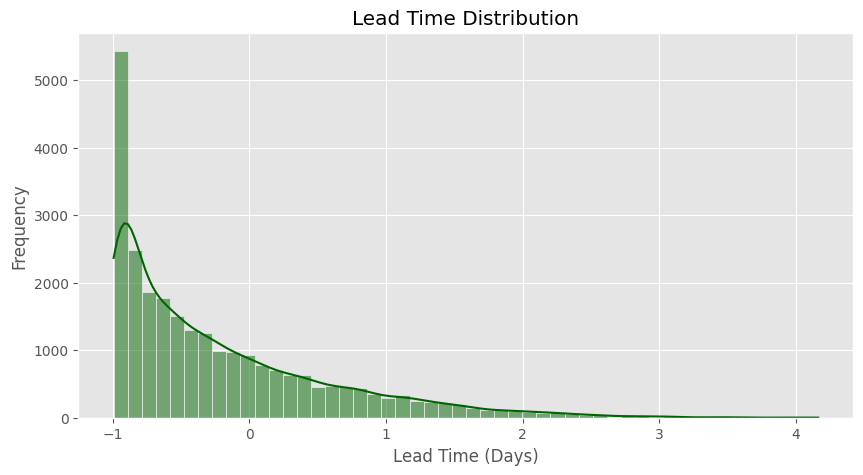

In [35]:
# Lead time distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["lead time"], bins=50, kde=True, color="darkgreen")
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()

### 🔍 **Key Observations**
- Most bookings have **short lead times**, indicating last-minute reservations are common.
- Some bookings occur **far in advance**, suggesting demand from well-planned travelers.
- Understanding lead times helps hotels **adjust cancellation policies and manage inventory more effectively**.

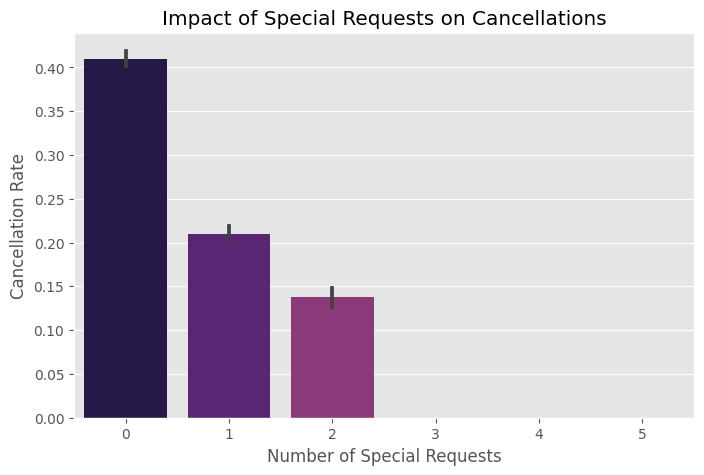

In [36]:
# Special requests impact on cancellations
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="special requests", y="canceled", palette="magma")
plt.title("Impact of Special Requests on Cancellations")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate")
plt.show()

### 🔍 **Key Observations**
- Guests with **higher numbers of special requests tend to cancel less often**.
- This may indicate **more engaged travelers who are certain about their stay**.
- Encouraging customers to make **specific requests** could help reduce cancellations.

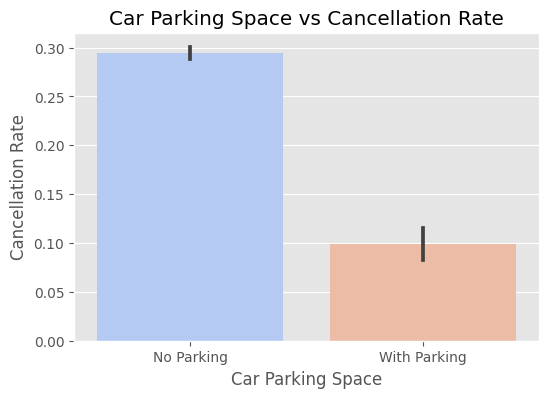

In [37]:
# Car parking impact on cancellations
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="car parking space", y="canceled", palette="coolwarm")
plt.xticks([0, 1], ["No Parking", "With Parking"])
plt.title("Car Parking Space vs Cancellation Rate")
plt.xlabel("Car Parking Space")
plt.ylabel("Cancellation Rate")
plt.show()

### 🔍 **Key Observations**
- Guests who **do not require parking seem to cancel more frequently**.
- This suggests that **travelers arriving by car may have more fixed travel plans**.
- Providing parking incentives or bundled deals could help reduce cancellations and attract committed customers.

### **6️⃣ Market Segmentation**
- Which customer segments book the most rooms?
- Which segment cancels the most?

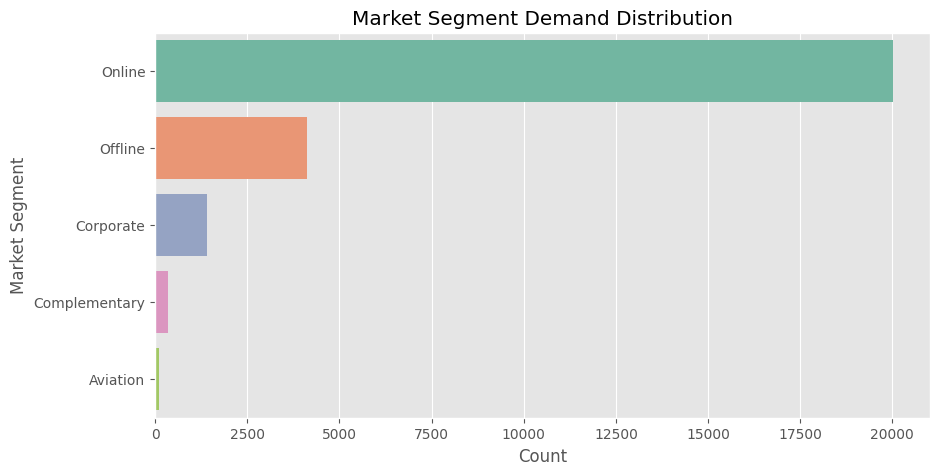

In [38]:
# Market segment demand distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="market segment type", palette="Set2", order=df["market segment type"].value_counts().index)
plt.title("Market Segment Demand Distribution")
plt.xlabel("Count")
plt.ylabel("Market Segment")
plt.show()

### 🔍 **Key Observations**
- Certain **market segments dominate bookings**, showing reliance on specific customer types.
- Segments like **online travel agencies or corporate clients** could have different behaviors and price sensitivities.
- Identifying high-demand segments can help hotels **tailor promotions and optimize pricing strategies**.

### **7️⃣ Correlation Heatmap**
- Identifying relationships between key features.

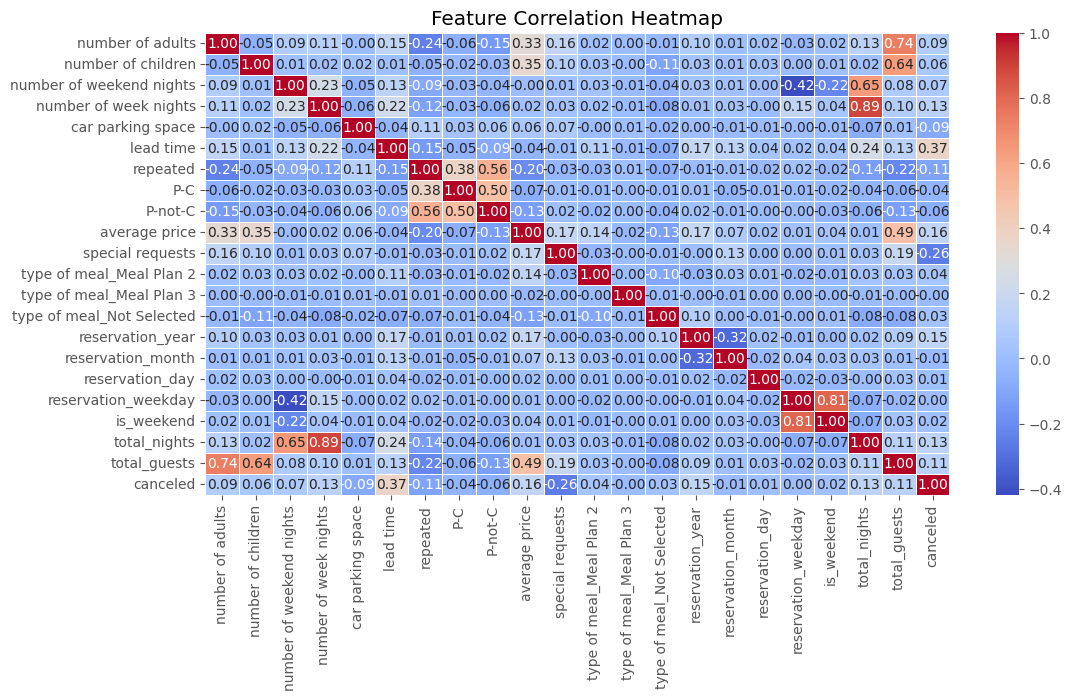

In [39]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### 🔥 **Key Insights from EDA**
1. **Booking Trends:**
   - Monthly reservations show **seasonal peaks**, with distinct demand patterns across years.
   - Certain months consistently have **higher booking volumes**, useful for planning promotions.

2. **Guest Behavior:**
   - Most bookings are for **solo travelers or couples**, indicating a preference for smaller groups.
   - **Repeated guests** form a small proportion, suggesting potential for loyalty programs.

3. **Stay Duration Analysis:**
   - **Most guests stay for short durations (1-5 nights).**
   - Weekday stays and weekend stays have **similar distributions**, suggesting balanced demand.

4. **Pricing Trends:**
   - Different **room types exhibit varied pricing distributions**, suggesting segmentation-based pricing.
   - Some room types have **wider price ranges**, indicating dynamic pricing strategies.

5. **Market Segmentation Insights:**
   - The most **demanded customer segments** are clearly visible.
   - **Cancellation rates vary** across different segments, with some more prone to cancellations.

6. **Cancellation Insights:**
   - Market segments like **Online Travel Agencies** tend to have **higher cancellation rates**.
   - **Longer lead times correlate with increased cancellations**, indicating possible overbooking trends.

7. **Feature Correlation:**
   - **Lead time and cancellations** are positively correlated.
   - **Special requests and repeated guests** **negatively correlate** with cancellations, meaning customers with specific needs tend to follow through with their bookings.
